In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv("preprocessed_data.csv")  # Replace with the path to your dataset file

# Define feature and target columns (make sure these columns exist in your dataset)
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Check if all required columns are present in the dataset
missing_features = [col for col in feature_columns if col not in data.columns]
missing_targets = [col for col in target_columns if col not in data.columns]

if missing_features:
    raise ValueError(f"Missing feature columns: {missing_features}")

if missing_targets:
    raise ValueError(f"Missing target columns: {missing_targets}")

# Separate features (X) and target variables (y)
X = data[feature_columns]
y = data[target_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest Regressor model for multiple target variables
rfr = RandomForestRegressor(random_state=42)

# Wrap Random Forest Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_rfr = MultiOutputRegressor(rfr)

# Fit the Random Forest Regressor model
multioutput_rfr.fit(X_train_scaled, y_train)

# Predict for the test set
y_pred_rfr = multioutput_rfr.predict(X_test_scaled)


# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")
# Function to predict nutrient values based on user input wavelengths
def predict_nutrients(wavelengths):
    # Convert the input list to a DataFrame
    user_data = pd.DataFrame([wavelengths], columns=feature_columns)
    
    # Handle missing values
    user_data_imputed = imputer.transform(user_data)
    
    # Scale the data
    user_data_scaled = scaler.transform(user_data_imputed)
    
    # Predict using the trained Random Forest Regressor model
    rfr_prediction = multioutput_rfr.predict(user_data_scaled)
    
    return rfr_prediction

# Function to get user input for wavelengths
def get_user_wavelengths():
    wavelengths = []
    for i in range(len(feature_columns)):
        while True:
            try:
                value = float(input(f"Enter value for {feature_columns[i]}: "))
                wavelengths.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")
    return wavelengths

# Get user input
user_wavelengths = get_user_wavelengths()

# Predict nutrient values
rfr_pred = predict_nutrients(user_wavelengths)

# Print the predictions with labels
print("\nRandom Forest Regressor Prediction:")
for nutrient, value in zip(target_columns, rfr_pred[0]):
    print(f"{nutrient}: {value:.2f}")


Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 5622.7461
Mean Absolute Error (MAE): 24.3319
Root Mean Squared Error (RMSE): 74.9850
R² Score: -0.2757

Random Forest Regressor Prediction:
P   (kg/ha): 31.43
K (kg/ha): 384.02
Ca (meq/100g): 13.71
Mg (meq/100g): 6.03
S (ppm): 38.45
Fe (ppm): 43.48
Mn (ppm): 22.16
Cu (ppm): 2.31
Zn (ppm): 1.82
B (ppm): 0.59


C:\Users\Ruchika Venkat\AppData\Local\Temp\ipykernel_3172\1761314831.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(target_columns)).colors  # Using tab10 colormap for distinct colors


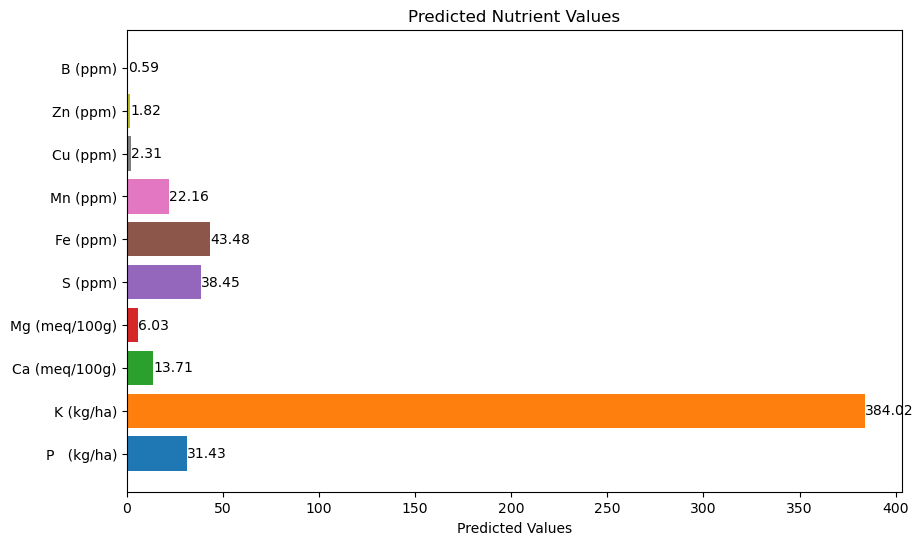

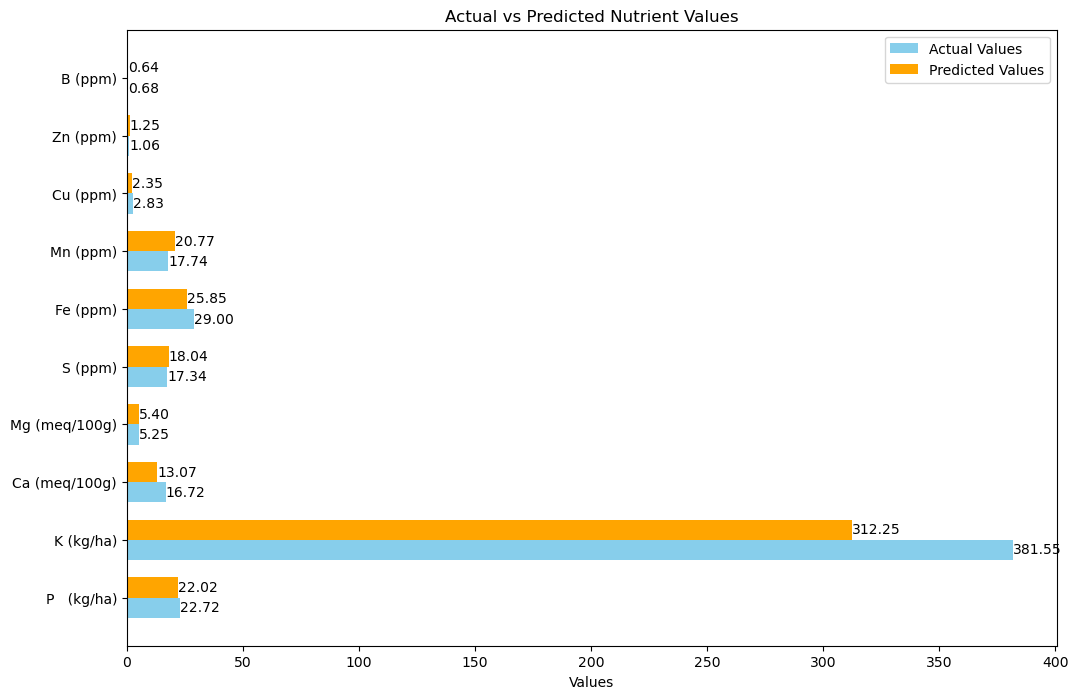

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load your dataset
data = pd.read_csv("preprocessed_data.csv")  

# Define feature and target columns (make sure these columns exist in your dataset)
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Check if all required columns are present in the dataset
missing_features = [col for col in feature_columns if col not in data.columns]
missing_targets = [col for col in target_columns if col not in data.columns]

if missing_features:
    raise ValueError(f"Missing feature columns: {missing_features}")

if missing_targets:
    raise ValueError(f"Missing target columns: {missing_targets}")

# Separate features (X) and target variables (y)
X = data[feature_columns]
y = data[target_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest Regressor model for multiple target variables
rfr = RandomForestRegressor(random_state=42)

# Wrap Random Forest Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_rfr = MultiOutputRegressor(rfr)

# Fit the Random Forest Regressor model
multioutput_rfr.fit(X_train_scaled, y_train)

# Predict for the test set
y_pred_rfr = multioutput_rfr.predict(X_test_scaled)

# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")

# Function to predict nutrient values based on user input wavelengths
def predict_nutrients(wavelengths):
    # Convert the input list to a DataFrame
    user_data = pd.DataFrame([wavelengths], columns=feature_columns)
    
    # Handle missing values
    user_data_imputed = imputer.transform(user_data)
    
    # Scale the data
    user_data_scaled = scaler.transform(user_data_imputed)
    
    # Predict using the trained Random Forest Regressor model
    rfr_prediction = multioutput_rfr.predict(user_data_scaled)
    
    return rfr_prediction

# Function to get user input for wavelengths
def get_user_wavelengths():
    wavelengths = []
    for i in range(len(feature_columns)):
        while True:
            try:
                value = float(input(f"Enter value for {feature_columns[i]}: "))
                wavelengths.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")
    return wavelengths

# Get user input
user_wavelengths = get_user_wavelengths()

# Predict nutrient values
rfr_pred = predict_nutrients(user_wavelengths)

# Print the predictions with labels
print("\nRandom Forest Regressor Prediction:")
for nutrient, value in zip(target_columns, rfr_pred[0]):
    print(f"{nutrient}: {value:.2f}")

# Create a horizontal bar plot for the predictions
colors = cm.get_cmap('tab10', len(target_columns)).colors  # Using tab10 colormap for distinct colors
plt.figure(figsize=(10, 6))
bars = plt.barh(target_columns, rfr_pred[0], color=colors)
plt.xlabel('Predicted Values')
plt.title('Predicted Nutrient Values')

# Adding values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))

# Plot actual values
actual_bars = plt.barh(indices - bar_width/2, y_test.mean(), bar_width, label='Actual Values', color='skyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width/2, y_pred_rfr.mean(axis=0), bar_width, label='Predicted Values', color='orange')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()



Training model for P   (kg/ha)
Best parameters found for P   (kg/ha): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


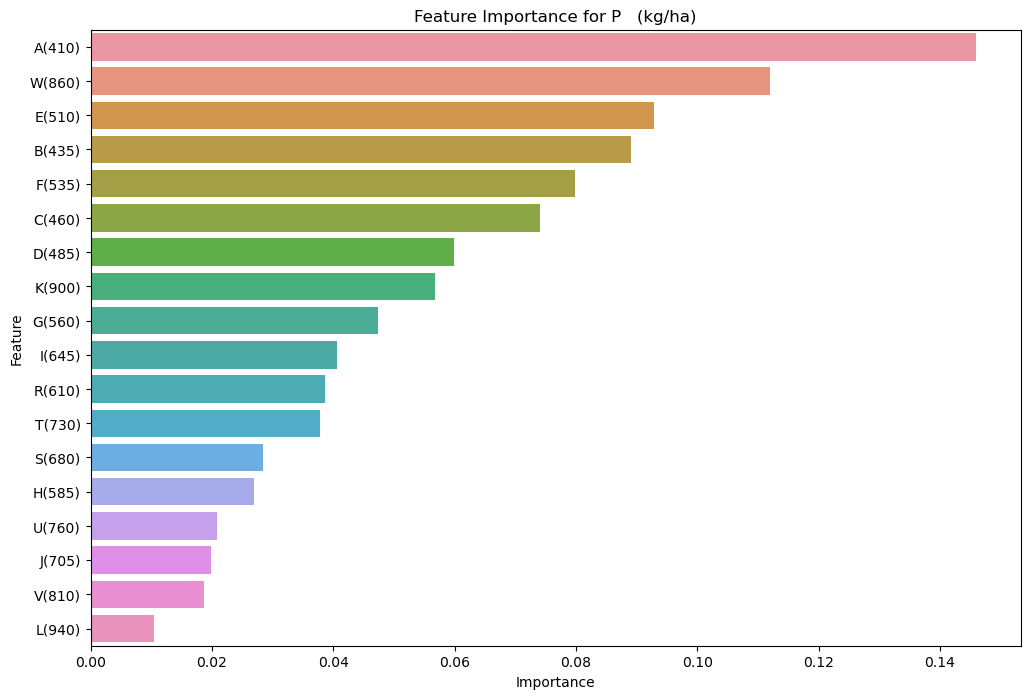

Training model for K (kg/ha)
Best parameters found for K (kg/ha): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


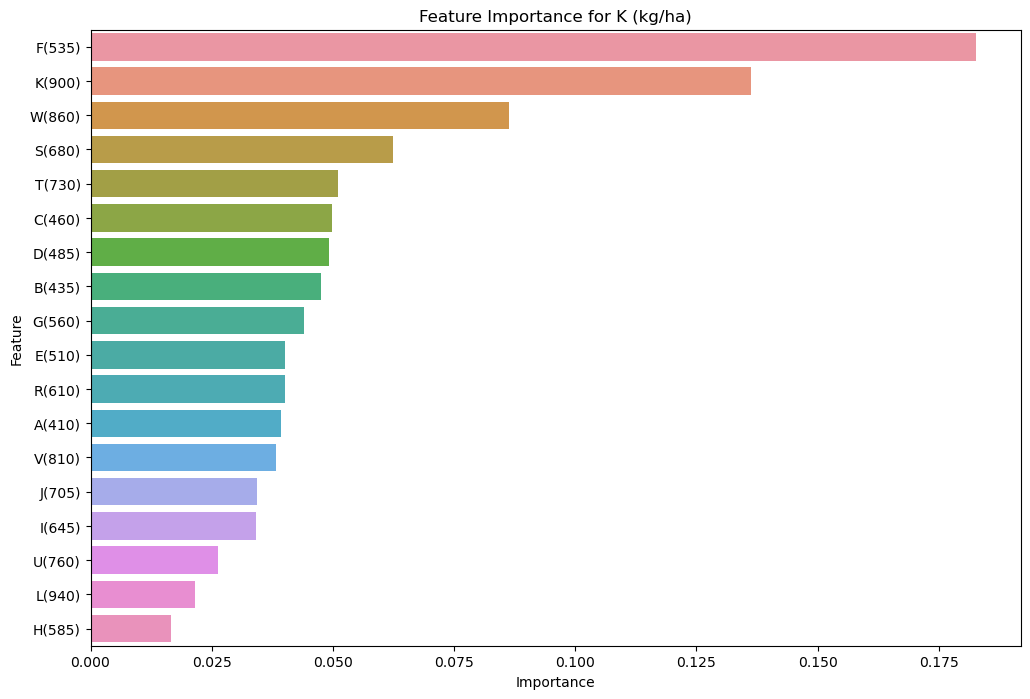

Training model for Ca (meq/100g)
Best parameters found for Ca (meq/100g): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


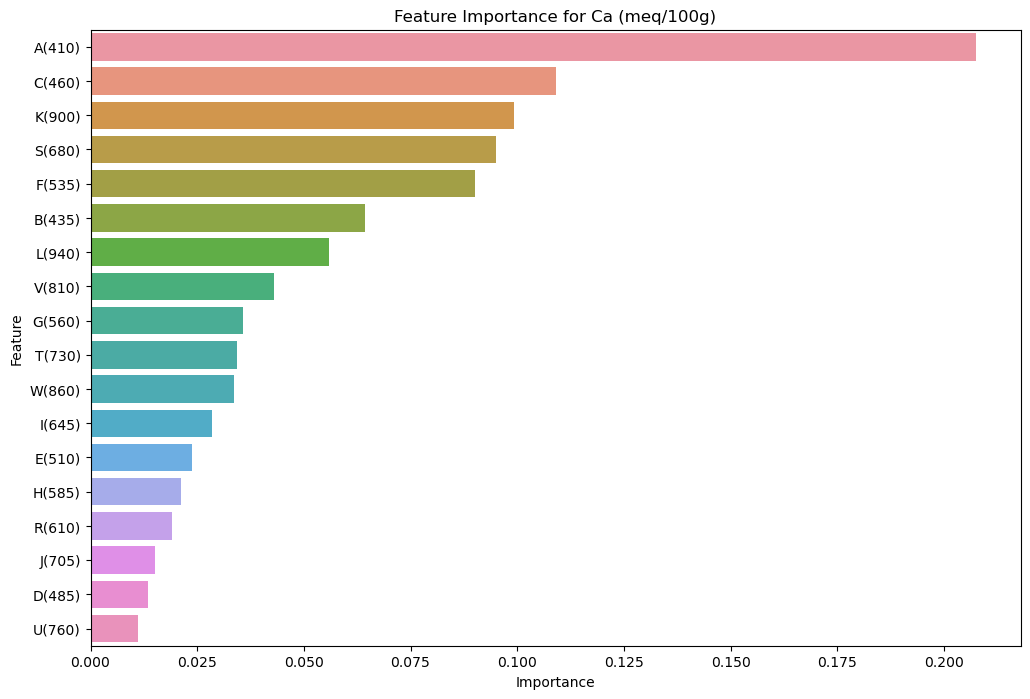

Training model for Mg (meq/100g)
Best parameters found for Mg (meq/100g): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


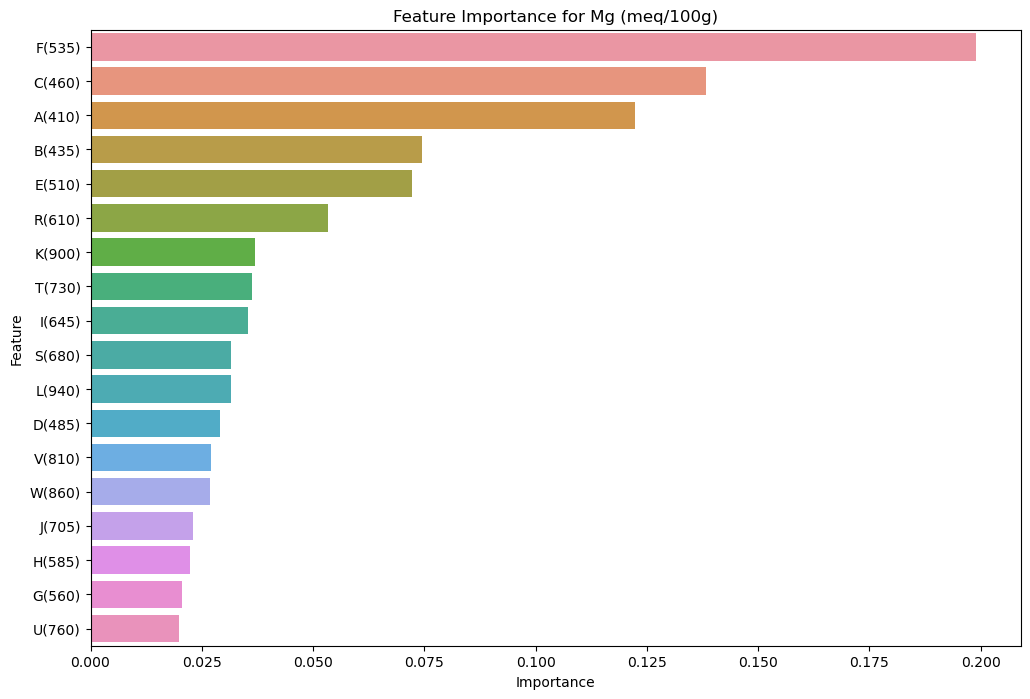

Training model for S (ppm)
Best parameters found for S (ppm): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


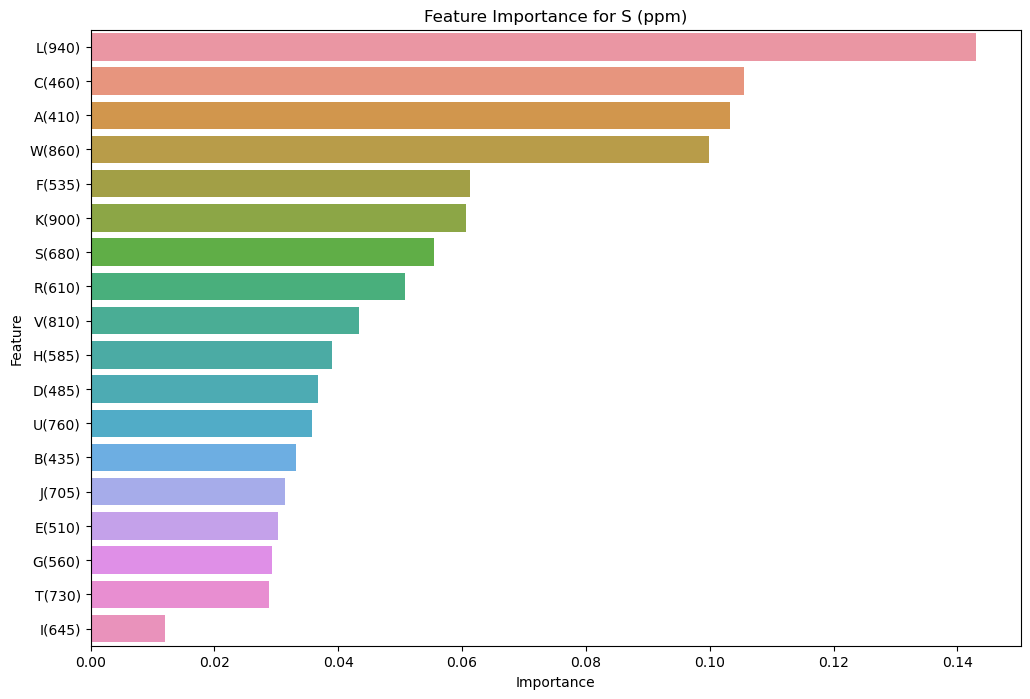

Training model for Fe (ppm)
Best parameters found for Fe (ppm): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


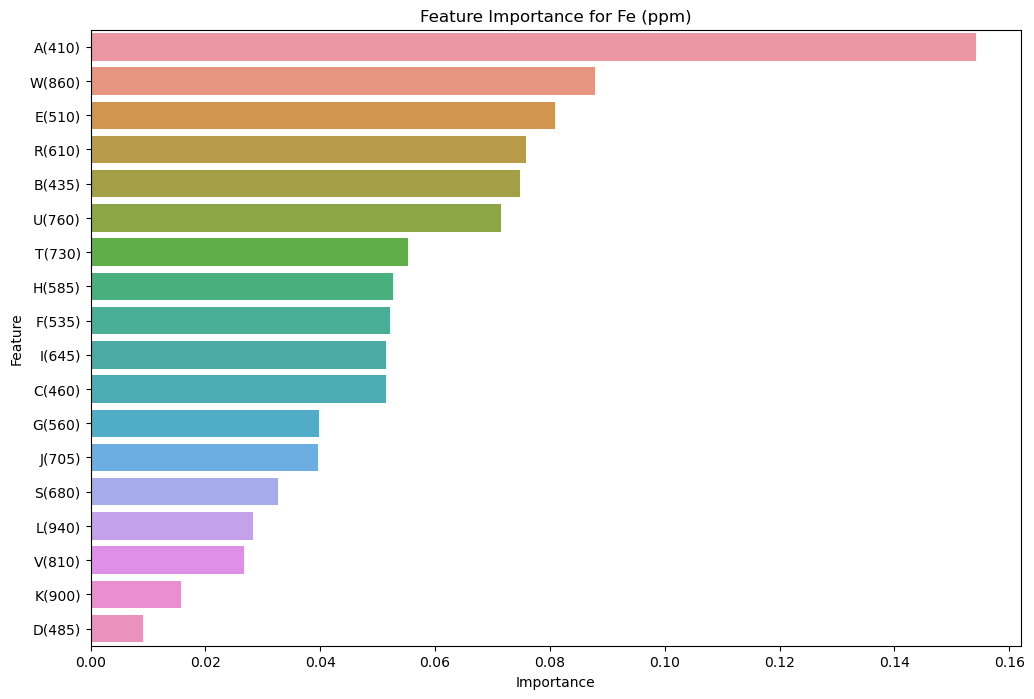

Training model for Mn (ppm)
Best parameters found for Mn (ppm): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


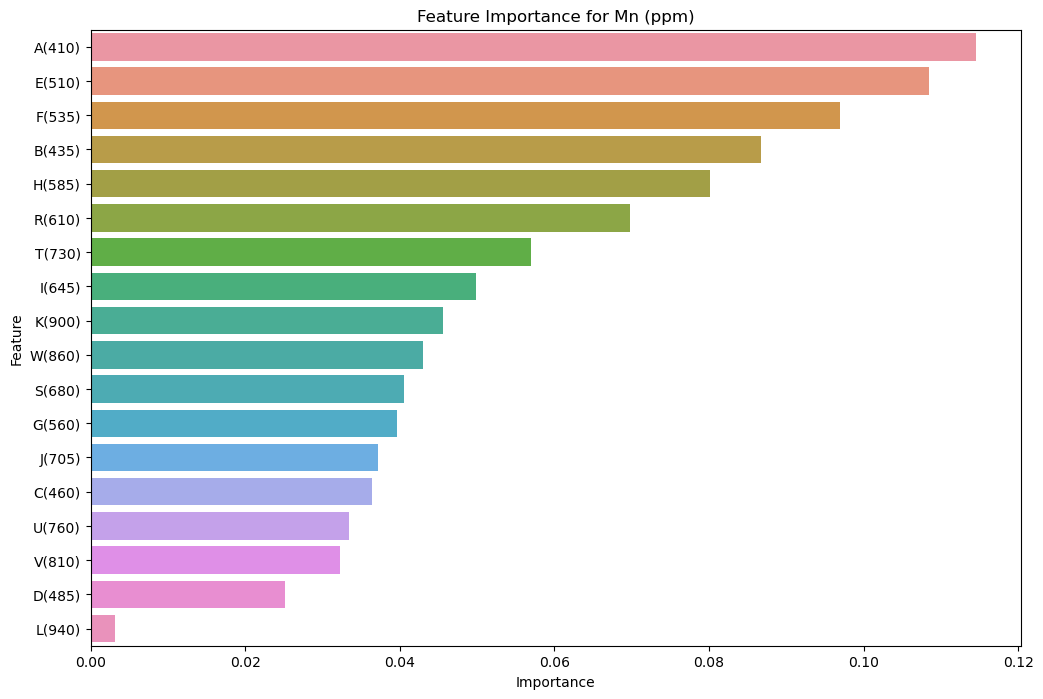

Training model for Cu (ppm)
Best parameters found for Cu (ppm): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


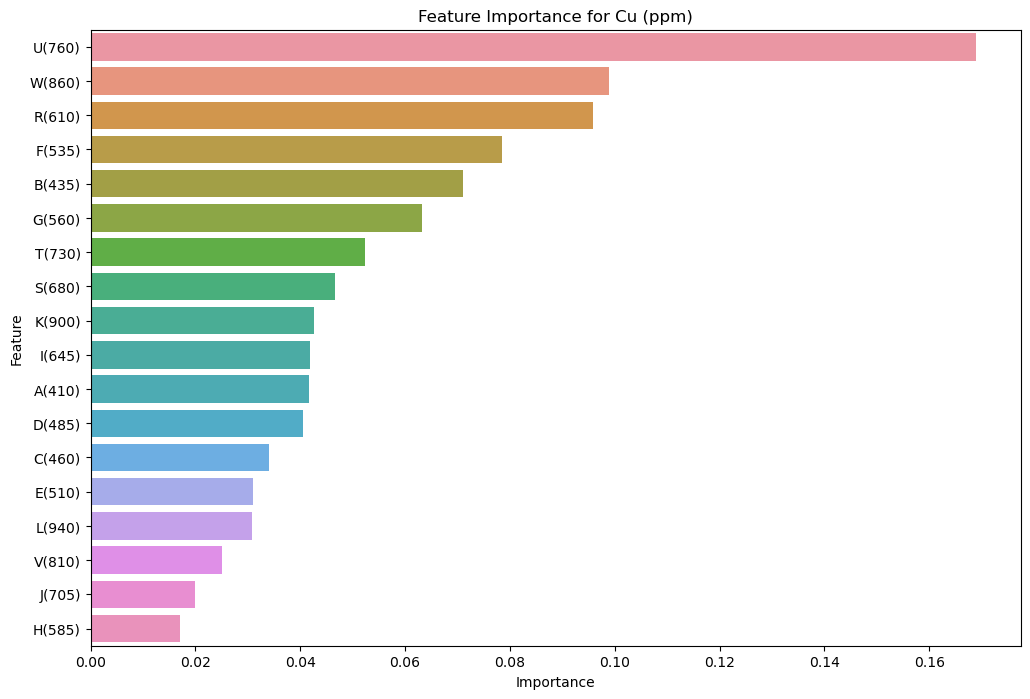

Training model for Zn (ppm)
Best parameters found for Zn (ppm): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


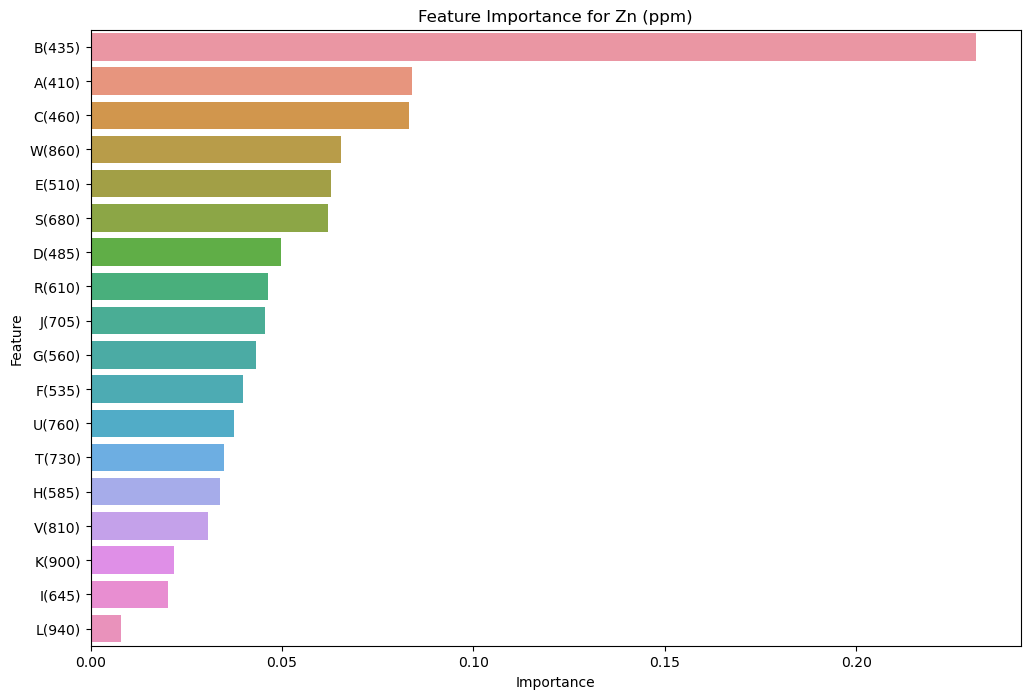

Training model for B (ppm)
Best parameters found for B (ppm): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


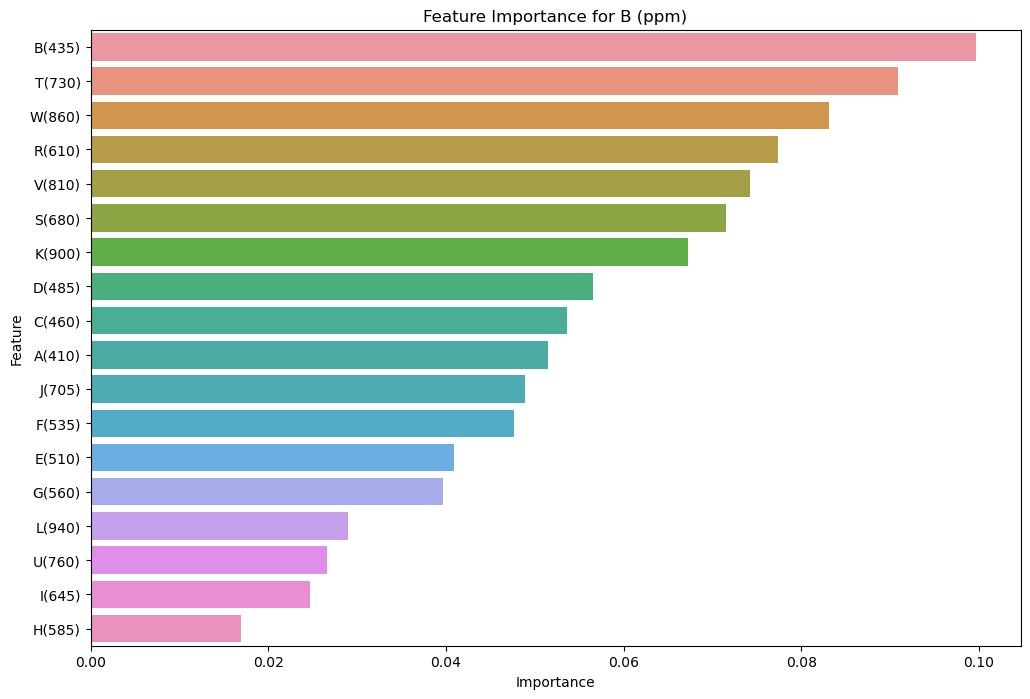

        Nutrient  Train RMSE   Test RMSE  Train R2   Test R2
0    P   (kg/ha)   10.613601   14.927678  0.750853 -0.044332
1      K (kg/ha)   94.315134  229.013271  0.734096 -0.254361
2  Ca (meq/100g)    8.997895   15.863280  0.582465  0.046795
3  Mg (meq/100g)    2.900525    4.219378  0.637877 -0.313846
4        S (ppm)    7.811171    7.968404  0.624253 -0.305092
5       Fe (ppm)   16.023176   33.243832  0.632484 -0.006697
6       Mn (ppm)   10.260133   15.799353  0.593926 -0.008302
7       Cu (ppm)    1.055769    2.359450  0.674983 -0.136239
8       Zn (ppm)    0.601519    0.860961  0.555134 -0.350719
9        B (ppm)    0.137443    0.329239  0.757819 -0.346299

Predicted Nutrient Concentrations and R² Values:

P   (kg/ha): 30.950845952380956, R²: -0.044331620809632044
K (kg/ha): 361.2275137998482, R²: -0.25436091561573915
Ca (meq/100g): 9.899771106140834, R²: 0.04679488899054551
Mg (meq/100g): 4.978063129820398, R²: -0.31384571198952615
S (ppm): 21.725129786527408, R²: -0.30509192781

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('values.csv')

# Define feature and target columns
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
                  'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Check if all required columns are present in the dataset
missing_features = [col for col in feature_columns if col not in data.columns]
missing_targets = [col for col in target_columns if col not in data.columns]

if missing_features:
    print(f'Missing feature columns: {missing_features}')
if missing_targets:
    print(f'Missing target columns: {missing_targets}')
if missing_features or missing_targets:
    raise ValueError('Missing columns in the dataset.')

# Inspect data types
# print(data.dtypes)

# Convert feature columns to numeric, coercing errors
data[feature_columns] = data[feature_columns].apply(pd.to_numeric, errors='coerce')

# Convert target columns to numeric, coercing errors
data[target_columns] = data[target_columns].apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
# print(data[feature_columns].isna().sum())
# print(data[target_columns].isna().sum())

# Fill missing values in feature columns with the median
data[feature_columns] = data[feature_columns].fillna(data[feature_columns].median())

# Fill missing values in target columns with the median
data[target_columns] = data[target_columns].fillna(data[target_columns].median())

# Separate features (X) and target variables (y)
X = data[feature_columns]
y = data[target_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store evaluation metrics
train_rmse_list = []
test_rmse_list = []
train_r2_list = []
test_r2_list = []

# Initialize a dictionary to store the trained models
models = {}

# Train a model for each target variable separately
for nutrient in target_columns:
    print(f'Training model for {nutrient}')

    # Initialize the model
    model = RandomForestRegressor(random_state=42)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [5, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Perform GridSearchCV with error_score='raise' to debug issues
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', error_score='raise')
    
    try:
        grid_search.fit(X_train, y_train[nutrient])
        
        # Get the best parameters
        best_params = grid_search.best_params_
        print(f'Best parameters found for {nutrient}: {best_params}')

        # Train the final model with the best parameters
        final_model = RandomForestRegressor(**best_params, random_state=42)
        final_model.fit(X_train, y_train[nutrient])

        # Store the trained model
        models[nutrient] = final_model

        # Make predictions
        y_train_pred = final_model.predict(X_train)
        y_test_pred = final_model.predict(X_test)

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train[nutrient], y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test[nutrient], y_test_pred))
        train_r2 = r2_score(y_train[nutrient], y_train_pred)
        test_r2 = r2_score(y_test[nutrient], y_test_pred)

        # Append the metrics to the lists
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)

        # Plot feature importance
        importance = final_model.feature_importances_
        feature_importance = pd.DataFrame({'Feature': feature_columns, 'Importance': importance})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'Feature Importance for {nutrient}')
        plt.show()

    except Exception as e:
        print(f"Error training model for {nutrient}: {e}")

# Create a DataFrame with evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Nutrient': target_columns,
    'Train RMSE': train_rmse_list,
    'Test RMSE': test_rmse_list,
    'Train R2': train_r2_list,
    'Test R2': test_r2_list
})

# Print the evaluation metrics
print(evaluation_metrics)

# Example of a new soil sample with reflectance values in watts/meter^2
new_soil_sample = {
    'A(410)': 2109.98,
    'B(435)': 474.78,
    'C(460)': 1908.18,
    'D(485)': 473,
    'E(510)': 685.12,
    'F(535)': 1546.98,
    'G(560)': 361.12,
    'H(585)': 391.98,
    'R(610)': 1262.12,
    'I(645)': 213.88,
    'S(680)': 328.47,
    'J(705)': 63.11,
    'T(730)': 79.43,
    'U(760)': 68.4,
    'V(810)': 235.11,
    'W(860)': 299.8,
    'K(900)': 111.12,
    'L(940)': 46.67
}

# Create a DataFrame for the new sample and ensure columns are in the correct order
new_sample_df = pd.DataFrame([new_soil_sample])[feature_columns]

# Predict the concentrations of each target nutrient for the new sample
predicted_concentrations = {}
r2_values = {}
for nutrient in target_columns:
    # Use the corresponding final model to predict each nutrient concentration
    if nutrient in models:
        final_model = models[nutrient]
        predicted_concentration = final_model.predict(new_sample_df)[0]
        predicted_concentrations[nutrient] = predicted_concentration

        # Calculate R² value
        y_test_pred = final_model.predict(X_test)
        r2 = r2_score(y_test[nutrient], y_test_pred)
        r2_values[nutrient] = r2
    else:
        predicted_concentrations[nutrient] = None
        r2_values[nutrient] = None

# Display the predicted concentrations and R² values for all target nutrients
print("\nPredicted Nutrient Concentrations and R² Values:\n")
for nutrient in target_columns:
    print(f"{nutrient}: {predicted_concentrations[nutrient]}, R²: {r2_values[nutrient]}")
